### QUESTION 1

 The product of two matrices having dimensions $(n \times k)$ and $(k \times m)$ will be a $(n \times m)$ matrix. For each element of this product matrix, if we want to find the element in the ith row and jth column, we need to multiply each element of the $i$th row of the first matrix with every element of the $j$th column of the second matrix, respectively, and find the sum of these products. Therefore, we need $k$ multiplications and $(k-1)$ additions for every element of our product matrix. Since we have $nm$ elements in total, we require $nmk$ multiplications and $nm(k-1)$ additions to perform the complete matrix multiplication.



### QUESTION 2

In [32]:
import numpy as np
a = [[1,2,3], [1,2,4],[1,2,3]]
b = [[2,3,4], [2,3,4],[2,3,4]]

def matrix_multiply(A, B):
    rA, cA = len(A), len(A[0])
    rB, cB = len(B), len(B[0])

    if cA != rB:
        raise ValueError("Number of columns in A must be equal to the number of rows in B")

    result = [[0 for _ in range(cB)] for _ in range(rA)]

    # Perform matrix multiplication
    for i in range(rA):
        for j in range(cB):
            for k in range(cA):
                result[i][j] += A[i][k] * B[k][j]
    
   
    return result

print(matrix_multiply(a, b))

print("Time required for my function:")
%timeit matrix_multiply(a,b)


np.dot(a,b)
print("Time taken by numpy:")
%timeit np.dot(a,b)

[[12, 18, 24], [14, 21, 28], [12, 18, 24]]
Time required for my function:
5.61 µs ± 237 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Time taken by numpy:
4.4 µs ± 99.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Execution Time of my function: 5.6 ns.

Execution time of NumPy's `dot` function: 4.4 ns.

It is observed that NumPy takes less time than my function. NumPy is faster because it uses a C language implementation.



### QUESTION 3

In [44]:
# METHOD 1
def find_median(array_1):
  array_2=[]
  length_array =len(array_1)
  for i in range((len(array_1)+1)//2+1):
    max=array_1[0]
    for j in range((len(array_1))):
      if array_1[j]>max:
        max=array_1[j]
    array_2.append(max)
    array_1.remove(max)


  if length_array %2!=0:
    return array_2[-2]
  else:
    return (array_2[-1]+array_2[-2])/2

l=np.linspace(0,100,num= 1000)
l = l.tolist()
print(find_median(l.copy()))
print("Time taken by the algorithm given in the questionnaire:")
%timeit find_median(l.copy())

#median using numpy
print(np.median(l))
print("Time taken by numpy.median:")
%timeit np.median(l)

#METHOD 2
def Median(array_1):
  array_1.sort()

  if len(array_1)%2 != 0:
    return array_1[int(len(array_1)//2)]
  else:
    g=len(array_1)
    return (array_1[int(g/2)-1]+ array_1[int(g/2)])/2

print(Median(l.copy()))
print("Time taken by my alternative algorithm:")
%timeit Median(l.copy())

50.0
Time taken by the algorithm given in the questionnaire:
21.2 ms ± 2.62 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
50.0
Time taken by numpy.median:
62.5 µs ± 2.9 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
50.0
Time taken by my alternative algorithm:
5.14 µs ± 112 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### QUESTION 4

In [46]:
def f(x,y) :
 return x*x*y+y**3*np.sin(x)
def gradient_x(x,y):
 return  2*x*y+ y**3*np.cos(x)
def gradient_y(x,y):
 return x**2 + 3*y**2*np.sin(x)
print("Gradient with respect to x at (2,1) according to my derivative:", gradient_x(2,1))
print("Gradient with respect to y at (2,1) according to my derivative:", gradient_y(2,1))

Gradient with respect to x at (2,1) according to my derivative: 3.5838531634528574
Gradient with respect to y at (2,1) according to my derivative: 6.727892280477045


### QUESTION 5

In [47]:
%pip install jax jaxlib
import jax
import jax.numpy as np

def f(x, y):
    return x**2 * y + y**3 * np.sin(x)

# gradient with respect to x
grad_f_x = jax.grad(f, argnums=0)

#gradient with respect to y
grad_f_y = jax.grad(f, argnums=1)

x_val = 2.0
y_val = 1.0
gradient_x_at_point = grad_f_x(x_val, y_val)
gradient_y_at_point = grad_f_y(x_val, y_val)

print("Gradient with respect to x at x={}, y={}: {}".format(x_val, y_val, gradient_x_at_point))
print("Gradient with respect to y at x={}, y={}: {}".format(x_val, y_val, gradient_y_at_point))



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
Gradient with respect to x at x=2.0, y=1.0: 3.583853244781494
Gradient with respect to y at x=2.0, y=1.0: 6.72789192199707


It can be clearly seen that the gradients with respect to x and y calculated analytically and by using jax are equal. 

### QUESTION 6

In [49]:
%pip install sympy
import sympy as sp

x = sp.symbols('x')
y = sp.symbols('y')


my_function = x**2*y + y**3*sp.sin(x)

gradient_x = sp.diff(my_function, x)
gradient_y = sp.diff(my_function, y)

print("function:", my_function )
print("gradient with respect to x:", gradient_x )
print("gardient with respect to y:", gradient_y)

Note: you may need to restart the kernel to use updated packages.
function: x**2*y + y**3*sin(x)
gradient with respect to x: 2*x*y + y**3*cos(x)
gardient with respect to y: x**2 + 3*y**2*sin(x)



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


##### Our function: $ x^2y + y^3\sin(x) $
##### gradient with respect to x: $2xy + y^3 \cos(x)$
##### gradient with respect to y: $x^2 + 3y^2\sin(x)$

### QUESTION 7

In [62]:
information={}
def add_year(dic,year):
    if type(year)==int:

        year=str(year)
    dic[year]={}

def add_branch(dic,year,branch):
    dic[year][branch]={}

def add_student(dic,year,branch,field_key,field_value):
    if type(field_value)==int:
        field_value=str(field_value)
    dic[year][branch][field_key]=field_value

def add_marks(dic, year, branch, student,marks, subject, mark):
    dic[year][branch][student][marks][subject]= mark

add_year(information,'2022')
add_branch(information,'2022','branch_1')
add_branch(information,'2022','branch_2')
add_student(information,'2022','branch_1','roll_number',1)
add_student(information,'2022','branch_1','name','N')
add_student(information,'2022','branch_1','Marks', "Subjects")
# add_marks(information, 2022,"branch_1", "N", "Marks", "maths",20)
add_year(information,'2023')
add_branch(information,'2023','branch_1')
add_branch(information,'2023','branch_2')

add_year(information,'2024')
add_branch(information,'2024','branch_1')
add_branch(information,'2024','branch_2')
add_year(information, 2025)
add_branch(information,'2025','branch_1')
add_branch(information,'2025','branch_2')

print(information)


{'2022': {'branch_1': {'roll_number': '1', 'name': 'N', 'Marks': 'Subjects'}, 'branch_2': {}}, '2023': {'branch_1': {}, 'branch_2': {}}, '2024': {'branch_1': {}, 'branch_2': {}}, '2025': {'branch_1': {}, 'branch_2': {}}}


### QUESTION 8

In [68]:
class student:
  def __init__(self,name,rollnumber,marks):
    self.name=name
    self.roll_number=rollnumber
    if type(marks)==list:
      self.marks=marks
    else:
      self.marks=[marks]

  def print_student(self):
    print("Name of student:",self.name)
    print("Roll number of student:",self.roll_number)
    print("Marks of student:",self.marks)

  def add_marks(self,marks):
    if type(marks)==list:
      self.marks=self.marks + marks
    else:
      self.marks.append(marks)
  def add_rollnumber(self,rollnumber):
    self.roll_number=rollnumber

class Branch(student):
  def __init__(self,branch,student=None):
    self.branch=branch
    if student!=None:
      self.student=[student]
    else:
      self.student=[]
  def print_branch(self):
    print("Branch of student:",self.branch)
    if len(self.student)!=0:
      for i in self.student:
        print()
        i.print_student()

  def add_student(self,student):
    self.student.append(student)

class year(Branch):
  def __init__(self,year,Branch=None):
    self.year=year
    if Branch!=None:
      self.Branch=[Branch]
    else:
      self.Branch=[]

  def add_branch(self,Branch):
    self.Branch.append(Branch)

  def show_details(self):
    print("Year of student:",self.year)
    print()
    if len(self.Branch)!=0:
      for i in self.Branch:
        i.print_branch()
        
a=student('A',22110144,[2,3,45])
b=student('B',22110145,[20,34])

br=Branch('branch_1',a)
br.add_student(b)
cr=Branch('Branch_2')
y=year(2022)
y.add_branch(br)
y.add_branch(cr)
y.show_details()

Year of student: 2022

Branch of student: branch_1

Name of student: A
Roll number of student: 22110144
Marks of student: [2, 3, 45]

Name of student: B
Roll number of student: 22110145
Marks of student: [20, 34]
Branch of student: Branch_2


### QUESTION 9


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


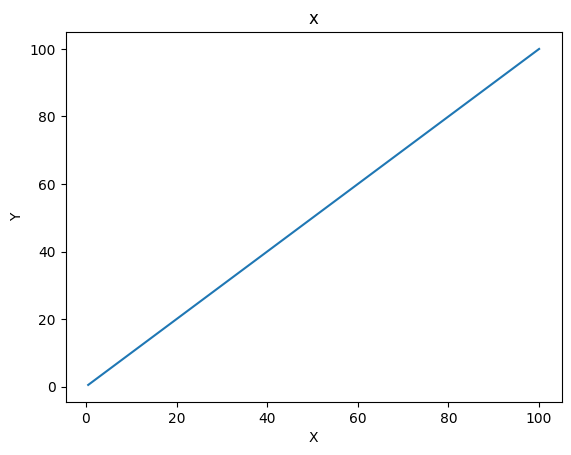

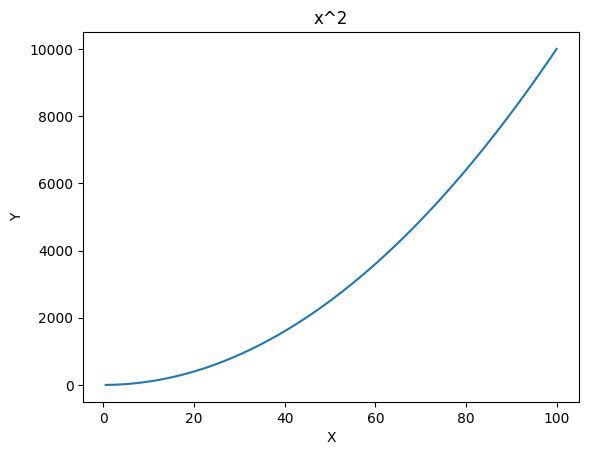

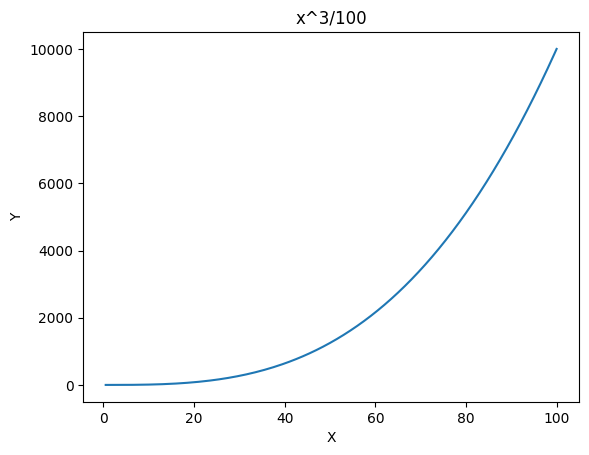

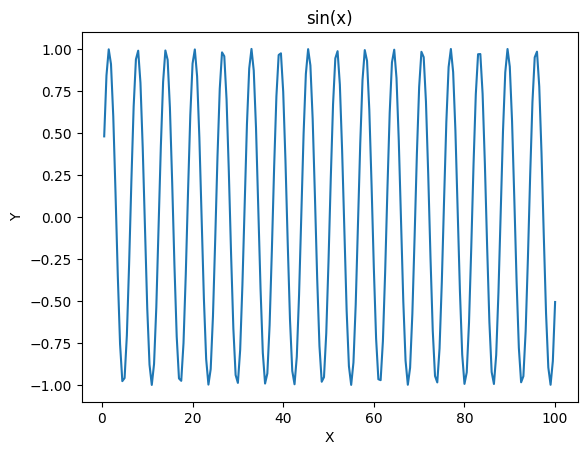

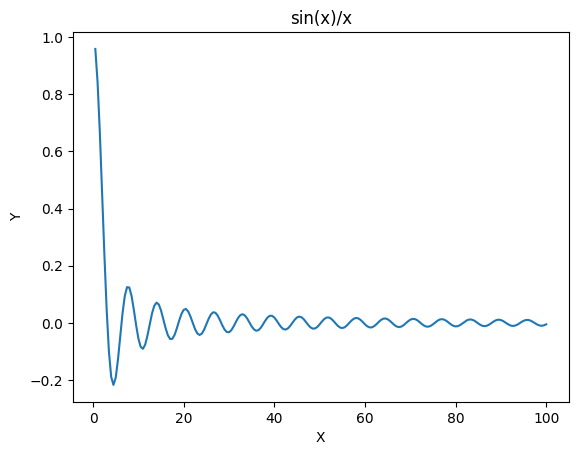

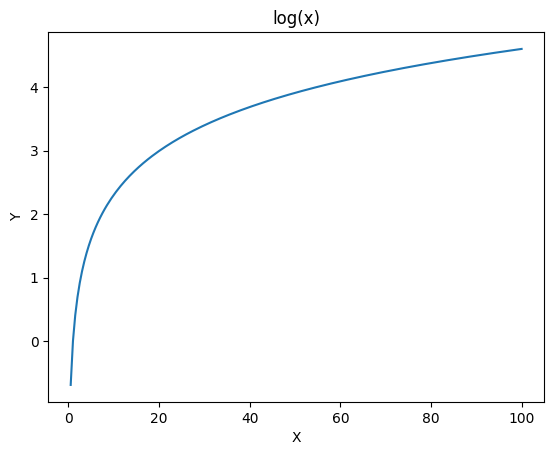

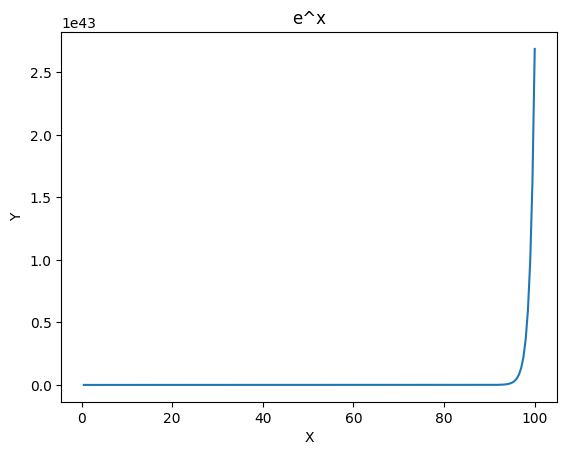

In [73]:
%pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np
def function_plot(fx,name1):
  x=np.arange(0.5,100.5,0.5)
  y=fx(x)
  plt.plot(x,y)
  plt.title(f"{str(name1)}")
  plt.xlabel("X")
  plt.ylabel('Y')

X=lambda x:x
X_square= lambda x: x*x
x_cube=lambda x: (x*x*x)/100
x_sin=lambda x: np.sin(x)
x_sin_x=lambda x: (np.sin(x))/x
x_log= lambda x:np.log(x)
x_e=lambda x: np.exp(x)

l=[X,X_square,x_cube,x_sin,x_sin_x,x_log,x_e]
l2=['x','x^2','x^3/100','sin(x)','sin(x)/x','log(x)','e^x']
for i in range(7):
  plt.figure(i)
  function_plot(l[i],l2[i])

### QUESTION 10

In [78]:
%pip install pandas
import pandas as pd



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



                                              0.0/10.6 MB ? eta -:--:--
                                              0.1/10.6 MB 1.7 MB/s eta 0:00:07
                                              0.1/10.6 MB 1.8 MB/s eta 0:00:06
                                              0.2/10.6 MB 1.7 MB/s eta 0:00:07
     -                                        0.4/10.6 MB 2.2 MB/s eta 0:00:05
     -                                        0.5/10.6 MB 2.1 MB/s eta 0:00:05
     --                                       0.5/10.6 MB 2.0 MB/s eta 0:00:06
     --                                       0.7/10.6 MB 2.2 MB/s eta 0:00:05
     --                                       0.8/10.6 MB 2.1 MB/s eta 0:00:05
     ---                                      0.9/10.6 MB 2.4 MB/s eta 0:00:05
     ---                                      1.0/10.6 MB 2.3 MB/s eta 0:00:05
     ----                                     1.2/10.6 MB 2.4 MB/s eta 0:00:04
     -----                                    1.4/10.6 MB 

In [86]:
matrix=np.random.uniform(1,2,(20,5))
column=['a','b','c','d','e']
df=pd.DataFrame(matrix, columns=column)
print(f"columns with highest standard deviation is {column[np.argmax(list(df.std()))]} with standard deviation {max(df.std())}")

df_mean=df.mean(axis=1)
# print(list(df_mean))
print(f"row with highest mean is {np.argmax(list(df_mean))} with mean {max(df_mean)}")

columns with highest standard deviation is b with standard deviation 0.3042135771688205
row with highest mean is 5 with mean 1.745110308173079


### QUESTION 11

In [88]:
df['f']=df['a']+df['b']+df['c']+df['d']+df['e']
df['g']=np.where(df['f']>8,'GT8','LT8')
dn=len(list(np.where(df['g']=='LT8')[0]))
print(f" Number of rows in which g has LT8 are {dn}")

print(f"SD for column f where g is GT8 {(df['f'].loc[df['g']=='GT8']).std()}")
print(f"SD for column f where g is LT8 {(df['f'].loc[df['g']=='LT8']).std()}")

 Number of rows in which g has LT8 are 15
SD for column f where g is GT8 0.25789100917534624
SD for column f where g is LT8 0.390613254823383


### QUESTION 12

Broadcasting is used in numpy when two entities are incompatiblr due to different dimensions. It provides a means of vectorising array operations so that looping occurs in C instead of Python. 

In [92]:
a = np.array([1,2,3,4,5])
b = 5
a+b


array([ 6,  7,  8,  9, 10])

In the above example, we can see that $a$ is an array while $b$ is just a number. to carry out the addition operation using numpy, $b$ is added to all elements of $a$

### QUESTION 13

In [90]:
tp=np.array([[1,2,3],[4,5,6],[7,8,9]])
def find_min_idx(array1):
  array1=array1.flatten()
  min=array1[0]
  idx=0
  for i in range(array1.shape[0]):
    if min>array1[i]:
      min=array1[i]
      idx=i
  return idx
s=find_min_idx(tp)
print(f"min without argmin is {s}")
print(f"min with argmin is {np.argmin(tp)}")

min without argmin is 0
min with argmin is 0
